In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',10000)
pd.set_option('display.min_rows',2000)
pd.set_option('display.column_space',30)
pd.set_option('display.max_colwidth',150)
pd.set_option('display.expand_frame_repr',True)

_end_dates    = pd.Series(pd.date_range(start="2020-10-08", end="2021-03-31", freq="D", tz='America/New_York'))
_start_dates  = _end_dates - pd.Timedelta(days=7)
_center_dates = _end_dates - pd.Timedelta(days=3.5)
end_dates     = _end_dates.apply(lambda x: x.timestamp())
center_dates  = _center_dates.apply(lambda x: x.timestamp())
start_dates   = _start_dates.apply(lambda x: x.timestamp())
_end_dates    = _end_dates.apply(lambda x:str(x).split(' ')[0])
_center_dates = _center_dates.apply(lambda x:str(x).split(' ')[0])
_start_dates  = _start_dates.apply(lambda x:str(x).split(' ')[0])


id_l = '/home/casonk/path/mmani_root/mmani0/shared_data/hot/push_file/IDL/'

In [3]:
subbert = [
    'conspiracy',
    'worldnews',
    'news',
    # 'worldpolitics',
    # 'worldevents',
    # 'business',
    # 'economics',
    # 'law',
    # 'government',
    # 'history',
    'politics',
    # 'politics2',
    # 'americanpolitics',
    'ukpolitics',
    # 'socialism',
    'conservative',
    # 'anarchism',
    # 'progressive',
    # 'liberal',
    # 'conservatives',
    # 'republicanism',
    # 'anarchist',
    # 'marxism',
    # 'objectivism',
    # 'communist',
    'libertarian',
    # 'egalitarianism',
    # 'freethought',
    # 'stateoftheunion',
    # 'politicaldiscussion',
    'politicalhumor',
    # 'culture',
    # 'corruption',
    # 'propaganda',
    # 'debate',
    # 'votingtheory',
    # 'racism',
    # 'moderatepolitics',
    # 'foodforthought',
    # 'democrats',
    # 'intelligence',
    # 'campaigns',
    # 'privacy',
    # 'collapse',
    # 'activism',
    # 'electionreform',
    # 'republican'
    # 'wayofthebern',
    # 'antiwork',
    # 'the_donald',
    # 'asktrumpsupporters',
    # 'truepolitics',
    # 'politic',
    # 'libertarianleft',
    # 'libertariandebates',
    # 'libertariansocialism',
    # 'demsocialist',
    # 'censorship',
    # 'centrist',
    # 'ask_politics',
    # 'neutralpolitics',
    ]

In [110]:
def get_ei(thresh, date, sub):
    rows = []
    for d in date:
        row = []
        for t in thresh[0]:
            ei = ei_data[t].loc[d[0], sub]
            # print(t,d,ei)
            row += [ei]
        rows += [row]

    return np.array(rows)

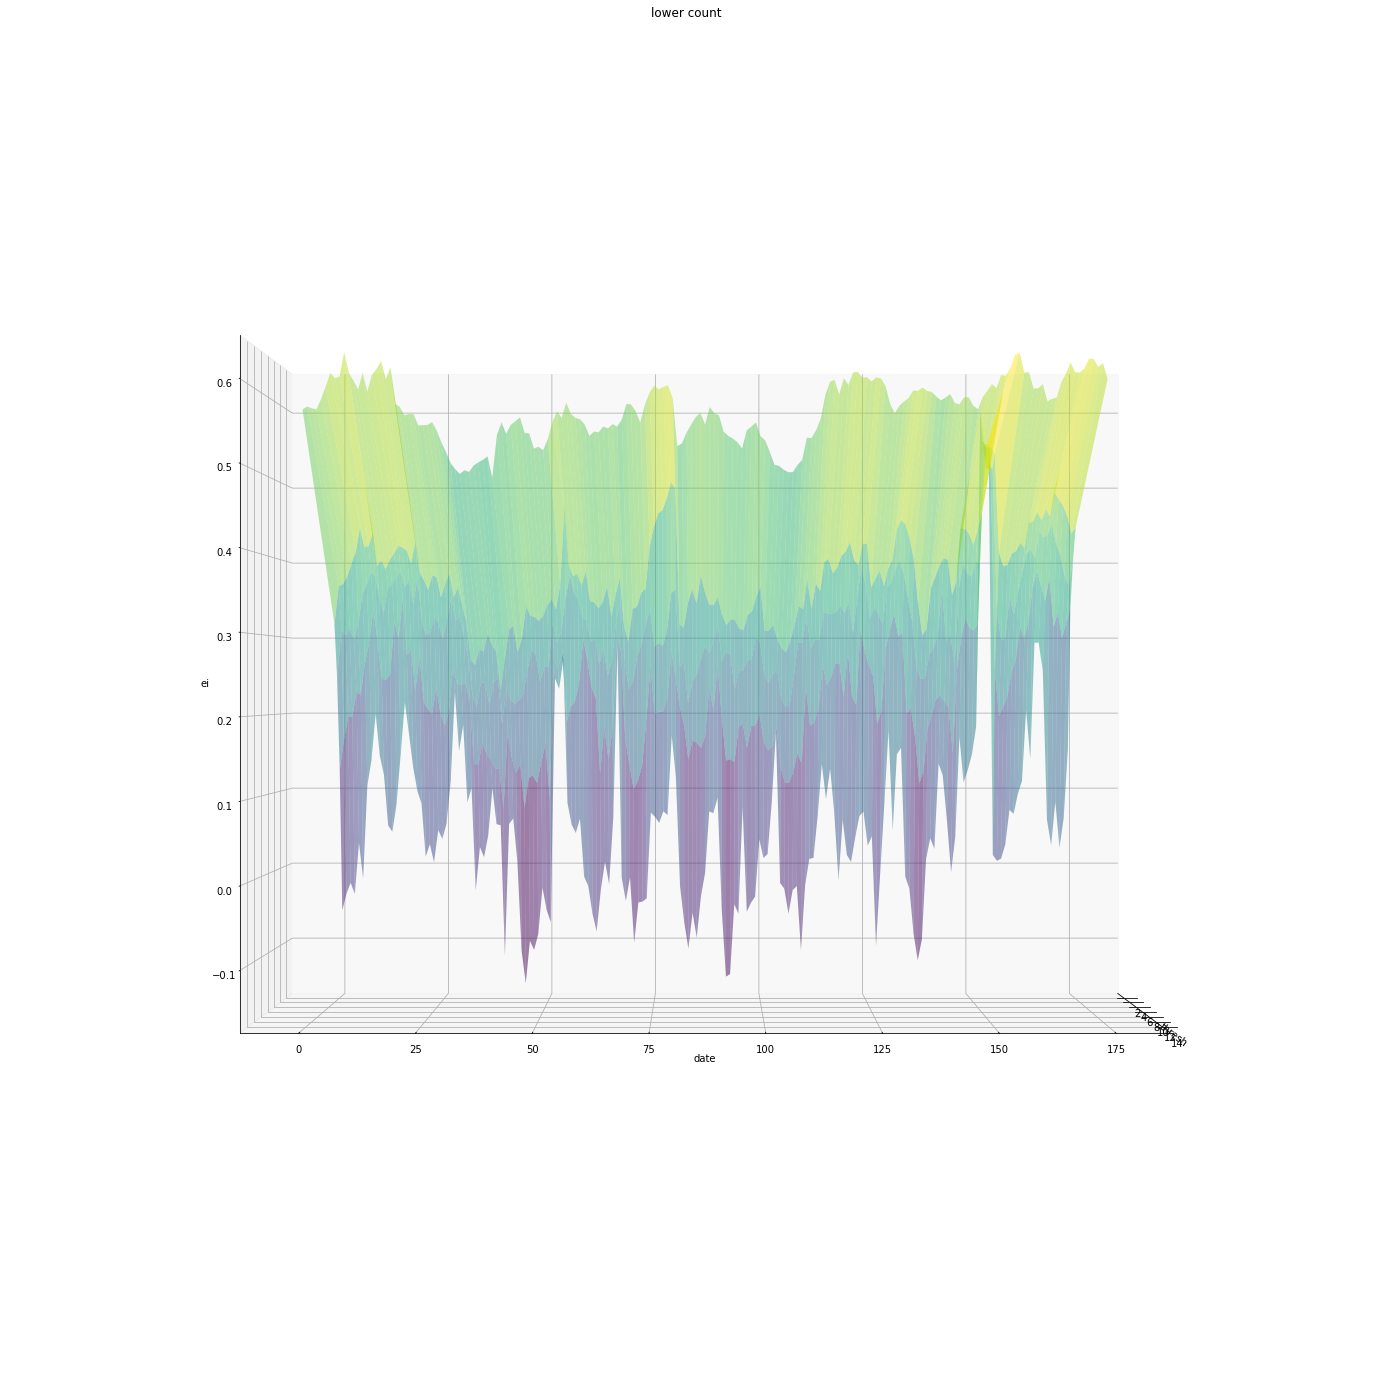

In [122]:
lower_count_nums = [1,2,3,4,5,6,7,8,9,10,15,20]
ei_data = {}
x = []
y = _center_dates

for num1 in lower_count_nums:
    try:
        ei_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_EI_DATA_{}__.pkl'.format(num1))))[subbert]
        # e_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_E_DATA_{}__.pkl'.format(num1))))[subbert]
        # i_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_I_DATA_{}__.pkl'.format(num1))))[subbert]
        # size_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_SIZE_DATA_{}__.pkl'.format(num1))))[subbert]
        # post_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_POST_DATA_{}__.pkl'.format(num1))))[subbert]

        x += [num1]
    except:
        continue

X, Y = np.meshgrid(x, y)

Z = get_ei(X, Y, 'conspiracy')

y = range(len(center_dates))
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(25,25))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha=0.5)
ax.set_xlabel('thresh')
ax.set_ylabel('date')
ax.set_zlabel('ei')
ax.set_title('lower count')
ax.view_init(0, 0)

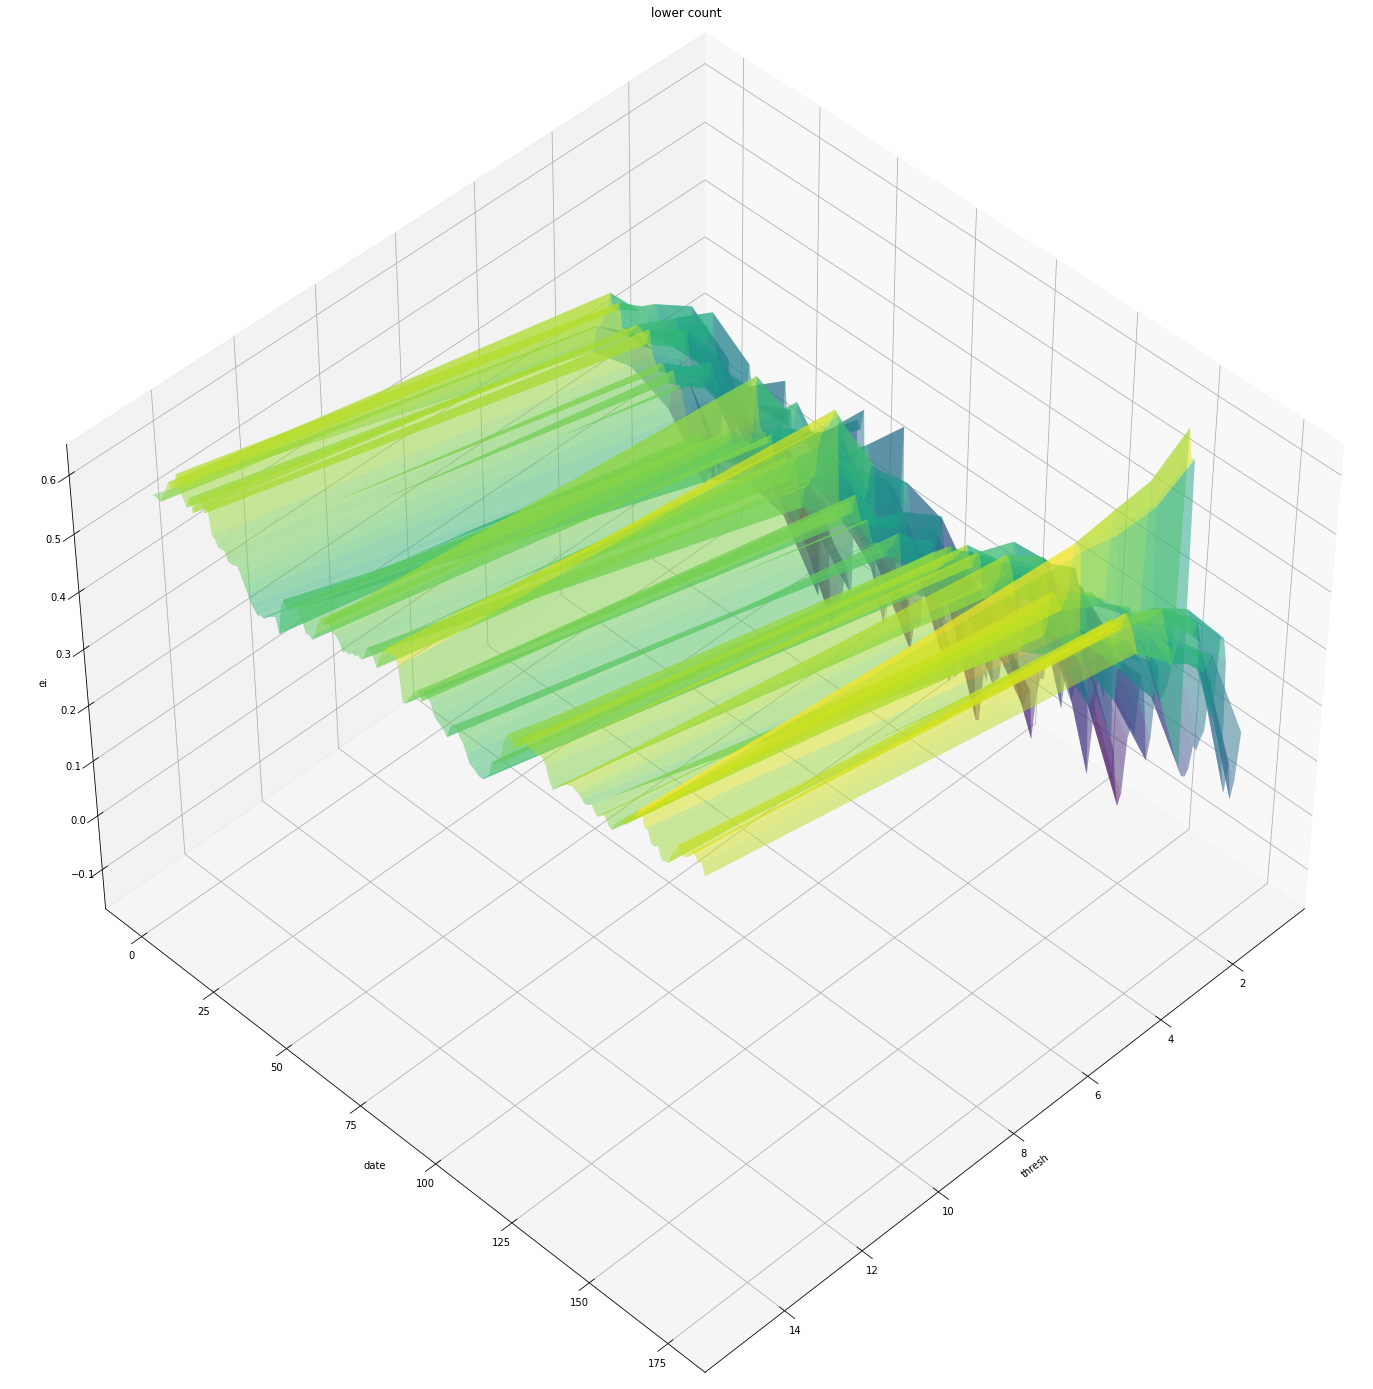

In [123]:
ax.view_init(45, 45)
fig

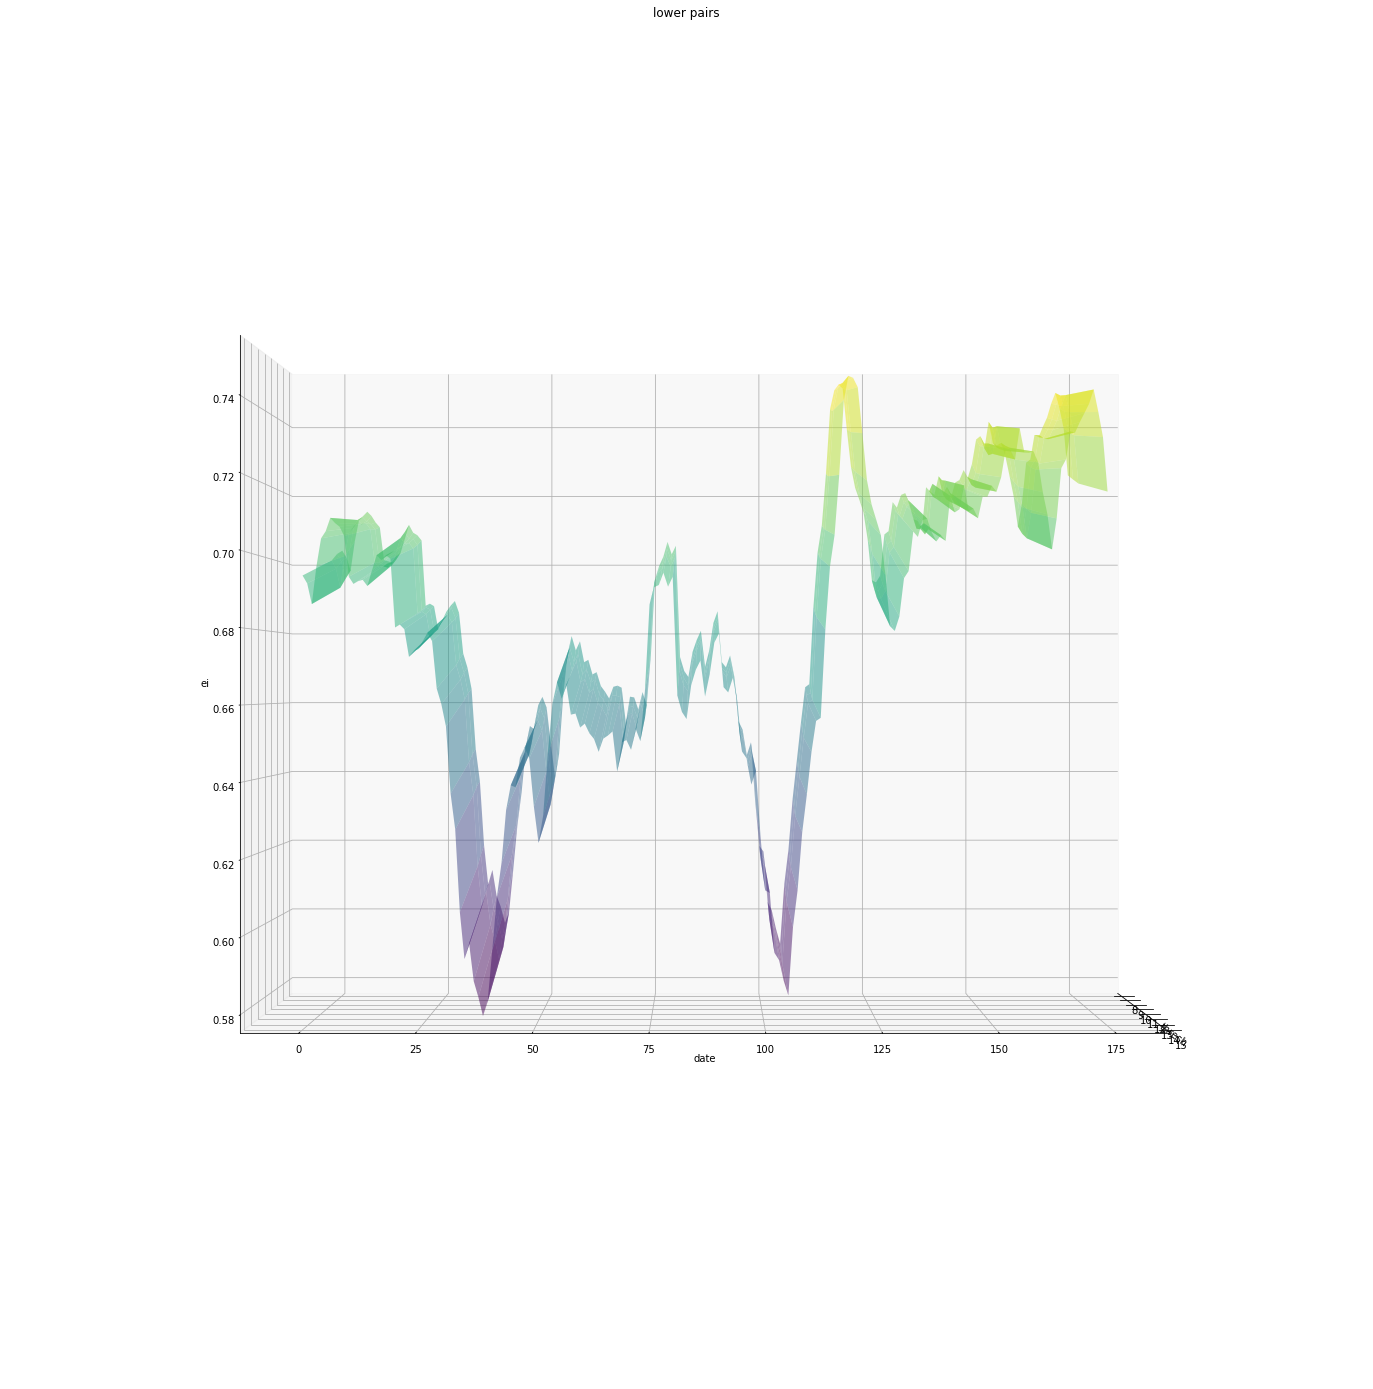

In [124]:
lower_pairs_nums = [2,3,4,5,6,7,8,9,10,15]
ei_data = {}
x = []
y = _center_dates

for num1 in lower_pairs_nums:
    try:
        ei_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_EI_DATA_{}_{}.pkl'.format(num1,0))))[subbert]
        # e_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_E_DATA_{}_{}.pkl'.format(num1,0))))[subbert]
        # i_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_I_DATA_{}_{}.pkl'.format(num1,0))))[subbert]
        # size_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_SIZE_DATA_{}_{}.pkl'.format(num1,0))))[subbert]
        # post_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_POST_DATA_{}_{}.pkl'.format(num1,0))))[subbert]

        x += [num1]
    except:
        continue

X, Y = np.meshgrid(x, y)

Z = get_ei(X, Y, 'conspiracy')

y = range(len(center_dates))
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(25,25))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha=0.5)
ax.set_xlabel('thresh')
ax.set_ylabel('date')
ax.set_zlabel('ei')
ax.set_title('lower pairs')
ax.view_init(0, 0)

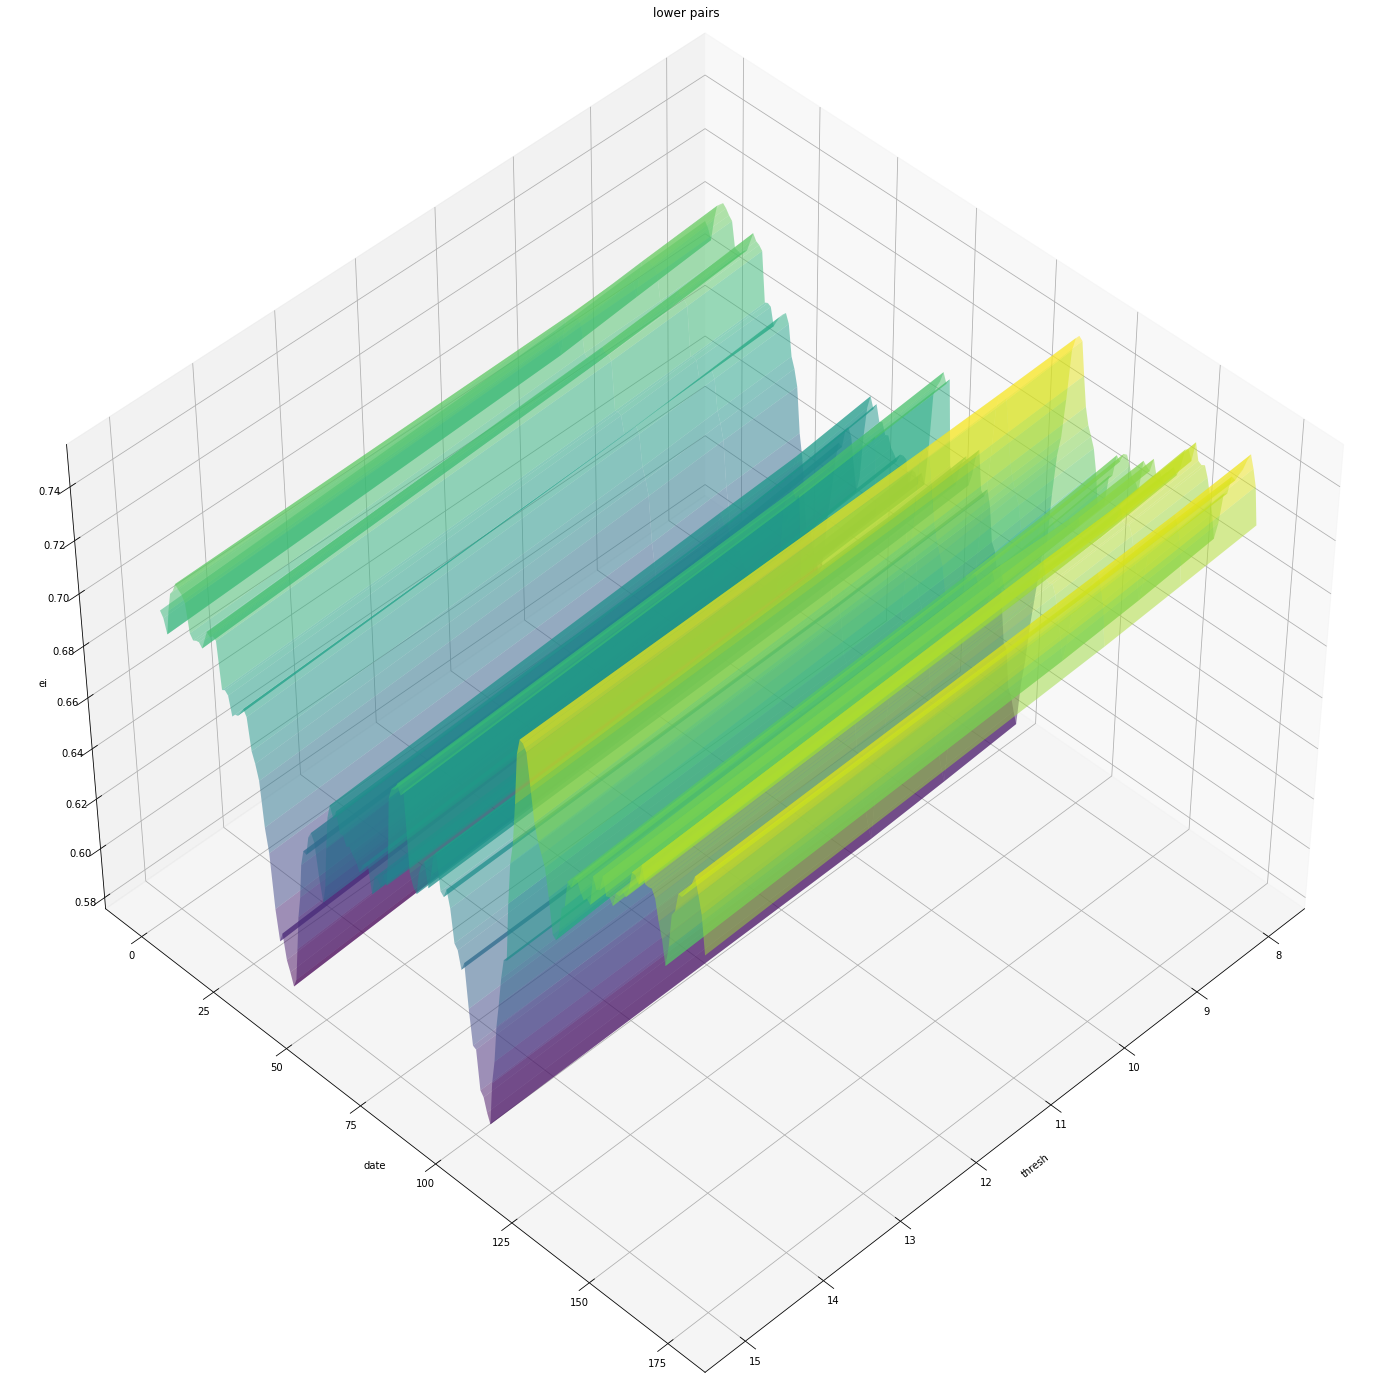

In [125]:
ax.view_init(45, 45)
fig

In [ ]:
upper_count_nums = [1,2,3,4,5,6,7,8,9,10,15,20]
ei_data = {}
x = []
y = _center_dates

for num1 in upper_count_nums:
    try:
        ei_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_EI_DATA__{}_.pkl'.format(num1))))[subbert]
        # e_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_E_DATA__{}_.pkl'.format(num1))))[subbert]
        # i_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_I_DATA__{}_.pkl'.format(num1))))[subbert]
        # size_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_SIZE_DATA__{}_.pkl'.format(num1))))[subbert]
        # post_data[num1] = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_POST_DATA__{}_.pkl'.format(num1))))[subbert]

        x += [num1]
    except:
        continue

X, Y = np.meshgrid(x, y)

Z = get_ei(X, Y, 'conspiracy')

y = range(len(center_dates))
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(25,25))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none', alpha=0.5)
ax.set_xlabel('thresh')
ax.set_ylabel('date')
ax.set_zlabel('ei')
ax.set_title('upper count')
ax.view_init(0, 0)